# Catboost Regressor Abalone Dataset

## Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

- There are no column names given.
- Let's copy it and add to the dataframe

In [51]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]

In [52]:
df = pd.read_csv('abalone.data', names=column_names)

In [53]:
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


- The only **issue we have is that the 'sex' column** is categorical.
- Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so we create a binary/boolean feature for each of the 3 options.
- Catboost is fine with such categorical data.
- When it comes to parameter tuning with **Grid search**, the categorical data often **throw errors**.
- Let's create **Dummy variables** for 'sex' column.

In [54]:
sex_dummies = pd.get_dummies(df['sex'])

In [55]:
df = pd.concat([df,sex_dummies], axis=1)
df = df.drop('sex', axis=1)

In [56]:
df.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [57]:
df.shape

(4177, 11)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   float64
 1   diameter        4177 non-null   float64
 2   height          4177 non-null   float64
 3   whole weight    4177 non-null   float64
 4   shucked weight  4177 non-null   float64
 5   viscera weight  4177 non-null   float64
 6   shell weight    4177 non-null   float64
 7   rings           4177 non-null   int64  
 8   F               4177 non-null   uint8  
 9   I               4177 non-null   uint8  
 10  M               4177 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 273.4 KB


In [59]:
df['rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [60]:
df['rings'].nunique()

28

## Split Data

In [61]:
X = df.drop('rings', axis=1)
y = df['rings']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Train the Model

In [64]:
from catboost import CatBoostRegressor

In [65]:
cb_model = CatBoostRegressor()

In [66]:
cb_model.fit(X_train, y_train)

Learning rate set to 0.047241
0:	learn: 3.1657283	total: 2.65ms	remaining: 2.65s
1:	learn: 3.1122822	total: 4.55ms	remaining: 2.27s
2:	learn: 3.0626006	total: 7.3ms	remaining: 2.43s
3:	learn: 3.0154435	total: 9.13ms	remaining: 2.27s
4:	learn: 2.9699761	total: 10.9ms	remaining: 2.16s
5:	learn: 2.9228155	total: 12.6ms	remaining: 2.09s
6:	learn: 2.8819607	total: 14.3ms	remaining: 2.03s
7:	learn: 2.8443565	total: 16ms	remaining: 1.99s
8:	learn: 2.8085693	total: 17.7ms	remaining: 1.94s
9:	learn: 2.7743419	total: 19.3ms	remaining: 1.91s
10:	learn: 2.7462100	total: 20.9ms	remaining: 1.88s
11:	learn: 2.7128541	total: 22.5ms	remaining: 1.85s
12:	learn: 2.6883741	total: 24.1ms	remaining: 1.83s
13:	learn: 2.6627304	total: 25.7ms	remaining: 1.81s
14:	learn: 2.6391129	total: 27.3ms	remaining: 1.79s
15:	learn: 2.6159472	total: 28.9ms	remaining: 1.77s
16:	learn: 2.5963931	total: 30.5ms	remaining: 1.76s
17:	learn: 2.5746850	total: 32.1ms	remaining: 1.75s
18:	learn: 2.5566827	total: 33.7ms	remaining: 1

196:	learn: 1.9711980	total: 320ms	remaining: 1.3s
197:	learn: 1.9707488	total: 321ms	remaining: 1.3s
198:	learn: 1.9698386	total: 323ms	remaining: 1.3s
199:	learn: 1.9692109	total: 325ms	remaining: 1.3s
200:	learn: 1.9686061	total: 326ms	remaining: 1.3s
201:	learn: 1.9684469	total: 328ms	remaining: 1.29s
202:	learn: 1.9681124	total: 329ms	remaining: 1.29s
203:	learn: 1.9674185	total: 331ms	remaining: 1.29s
204:	learn: 1.9672217	total: 332ms	remaining: 1.29s
205:	learn: 1.9662218	total: 334ms	remaining: 1.29s
206:	learn: 1.9654526	total: 336ms	remaining: 1.29s
207:	learn: 1.9646514	total: 338ms	remaining: 1.29s
208:	learn: 1.9642174	total: 340ms	remaining: 1.29s
209:	learn: 1.9629408	total: 341ms	remaining: 1.28s
210:	learn: 1.9623702	total: 343ms	remaining: 1.28s
211:	learn: 1.9619041	total: 345ms	remaining: 1.28s
212:	learn: 1.9612906	total: 346ms	remaining: 1.28s
213:	learn: 1.9607199	total: 348ms	remaining: 1.28s
214:	learn: 1.9606603	total: 350ms	remaining: 1.28s
215:	learn: 1.957

409:	learn: 1.7354889	total: 661ms	remaining: 951ms
410:	learn: 1.7347344	total: 663ms	remaining: 950ms
411:	learn: 1.7340154	total: 665ms	remaining: 949ms
412:	learn: 1.7327414	total: 667ms	remaining: 948ms
413:	learn: 1.7313237	total: 669ms	remaining: 947ms
414:	learn: 1.7303880	total: 670ms	remaining: 945ms
415:	learn: 1.7289087	total: 672ms	remaining: 943ms
416:	learn: 1.7275301	total: 674ms	remaining: 942ms
417:	learn: 1.7268728	total: 676ms	remaining: 941ms
418:	learn: 1.7256230	total: 678ms	remaining: 940ms
419:	learn: 1.7255020	total: 679ms	remaining: 938ms
420:	learn: 1.7239699	total: 681ms	remaining: 937ms
421:	learn: 1.7234750	total: 683ms	remaining: 936ms
422:	learn: 1.7227960	total: 685ms	remaining: 935ms
423:	learn: 1.7215730	total: 688ms	remaining: 934ms
424:	learn: 1.7200208	total: 690ms	remaining: 933ms
425:	learn: 1.7196158	total: 691ms	remaining: 932ms
426:	learn: 1.7182495	total: 693ms	remaining: 930ms
427:	learn: 1.7166917	total: 695ms	remaining: 928ms
428:	learn: 

610:	learn: 1.5688682	total: 990ms	remaining: 630ms
611:	learn: 1.5679904	total: 992ms	remaining: 629ms
612:	learn: 1.5675268	total: 994ms	remaining: 627ms
613:	learn: 1.5671141	total: 995ms	remaining: 626ms
614:	learn: 1.5667676	total: 997ms	remaining: 624ms
615:	learn: 1.5663794	total: 998ms	remaining: 622ms
616:	learn: 1.5661906	total: 1000ms	remaining: 621ms
617:	learn: 1.5654211	total: 1s	remaining: 619ms
618:	learn: 1.5643505	total: 1s	remaining: 618ms
619:	learn: 1.5632817	total: 1s	remaining: 616ms
620:	learn: 1.5618142	total: 1.01s	remaining: 614ms
621:	learn: 1.5607018	total: 1.01s	remaining: 613ms
622:	learn: 1.5599065	total: 1.01s	remaining: 611ms
623:	learn: 1.5598315	total: 1.01s	remaining: 610ms
624:	learn: 1.5591413	total: 1.01s	remaining: 608ms
625:	learn: 1.5580348	total: 1.01s	remaining: 606ms
626:	learn: 1.5576445	total: 1.02s	remaining: 605ms
627:	learn: 1.5573181	total: 1.02s	remaining: 603ms
628:	learn: 1.5570901	total: 1.02s	remaining: 601ms
629:	learn: 1.555722

828:	learn: 1.4417038	total: 1.33s	remaining: 275ms
829:	learn: 1.4412540	total: 1.33s	remaining: 274ms
830:	learn: 1.4408389	total: 1.34s	remaining: 272ms
831:	learn: 1.4406864	total: 1.34s	remaining: 270ms
832:	learn: 1.4399681	total: 1.34s	remaining: 269ms
833:	learn: 1.4398758	total: 1.34s	remaining: 267ms
834:	learn: 1.4395832	total: 1.34s	remaining: 266ms
835:	learn: 1.4384042	total: 1.34s	remaining: 264ms
836:	learn: 1.4379870	total: 1.35s	remaining: 263ms
837:	learn: 1.4371642	total: 1.35s	remaining: 261ms
838:	learn: 1.4366434	total: 1.35s	remaining: 259ms
839:	learn: 1.4357574	total: 1.35s	remaining: 258ms
840:	learn: 1.4357437	total: 1.35s	remaining: 256ms
841:	learn: 1.4345549	total: 1.36s	remaining: 255ms
842:	learn: 1.4334024	total: 1.36s	remaining: 253ms
843:	learn: 1.4326595	total: 1.36s	remaining: 251ms
844:	learn: 1.4322748	total: 1.36s	remaining: 250ms
845:	learn: 1.4312525	total: 1.36s	remaining: 248ms
846:	learn: 1.4305905	total: 1.36s	remaining: 246ms
847:	learn: 

## Predict and Evaluate

In [67]:
predict = cb_model.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
r2_score(predict, y_test)

0.28182339273989665

In [72]:
feature_importance = cb_model.feature_importances_ 

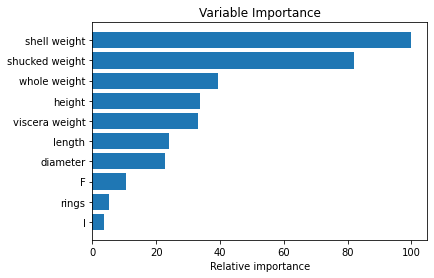

In [73]:
feature_importance = 100 * feature_importance/feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable Importance')
plt.show()

In [74]:
print('MAE:', mean_absolute_error(y_test, predict))
print('MSE:', mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predict)))

MAE: 1.5194446127308034
MSE: 4.672336030447487
RMSE: 2.161558703909632


In [78]:
index_position = 0
np_y_test = np.array(y_test)
actual = np_y_test[index_position]
pred = predict[index_position]
diff = actual-pred
if diff < 0:
    diff = diff * -1
perc = diff/actual*100
print('Actual is          : ' + str(actual))
print('Prediction is      : ' + str(round(pred,0)))
print('Difference is      : ' + str(round(diff,2)))
print('Error Percentage is: ' + str(round(perc,2))+'%')

Actual is          : 7
Prediction is      : 8.0
Difference is      : 0.59
Error Percentage is: 8.42%


In [81]:
# Average Error Rate for all the training data
total_error = 0
np_y_test = np.array(y_test)
for i in range(len(y_test)):
    actual = np_y_test[i]
    pred = predict[i]
    diff = actual-pred
    if diff <0:
        diff = diff * -1
    perc = diff/actual
    total_error += perc
    
average_error = total_error / len(y_test) *100
print('Average Error:', round(average_error,2),'%')
print('Test Accuracy:', 100-round(average_error,2),'%')

Average Error: 15.01 %
Test Accuracy: 84.99 %
